# Linear Transformations

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
print('')

In [3]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

% This lecture should be expanded using more of the examples from the book. - 9/15

So far we've been treating the matrix equation

$$ A{\bf x} = {\bf b}$$

as simply another way of writing the vector equation

$$ x_1{\bf a_1} + \dots + x_n{\bf a_n} = {\bf b}.$$

However, we'll now think of the matrix equation in a new way: we will think of $A$ as "acting on" the vector ${\bf x}$ to form a new vector ${\bf b}$.

For example, let's let $A = \left[\begin{array}{rrrr}4&-3&1&3\\2&0&5&1\end{array}\right].$  Then we find:

$$ A \left[\begin{array}{r}1\\1\\1\\1\end{array}\right] = \left[\begin{array}{r}5\\8\end{array}\right] \;\;\; \mbox{and} \;\;\; A \left[\begin{array}{r}1\\4\\-1\\3\end{array}\right] = \left[\begin{array}{r}0\\0\end{array}\right].$$

In other words, if ${\bf x} = \left[\begin{array}{r}1\\1\\1\\1\end{array}\right]$ and ${\bf b} = \left[\begin{array}{r}5\\8\end{array}\right]$, then $A$ _transforms_ ${\bf x}$ into ${\bf b}$.

Likewise, if ${\bf u} =\left[\begin{array}{r}1\\4\\-1\\3\end{array}\right],$ then $A$ transforms ${\bf u}$ into the ${\bf 0}$ vector.

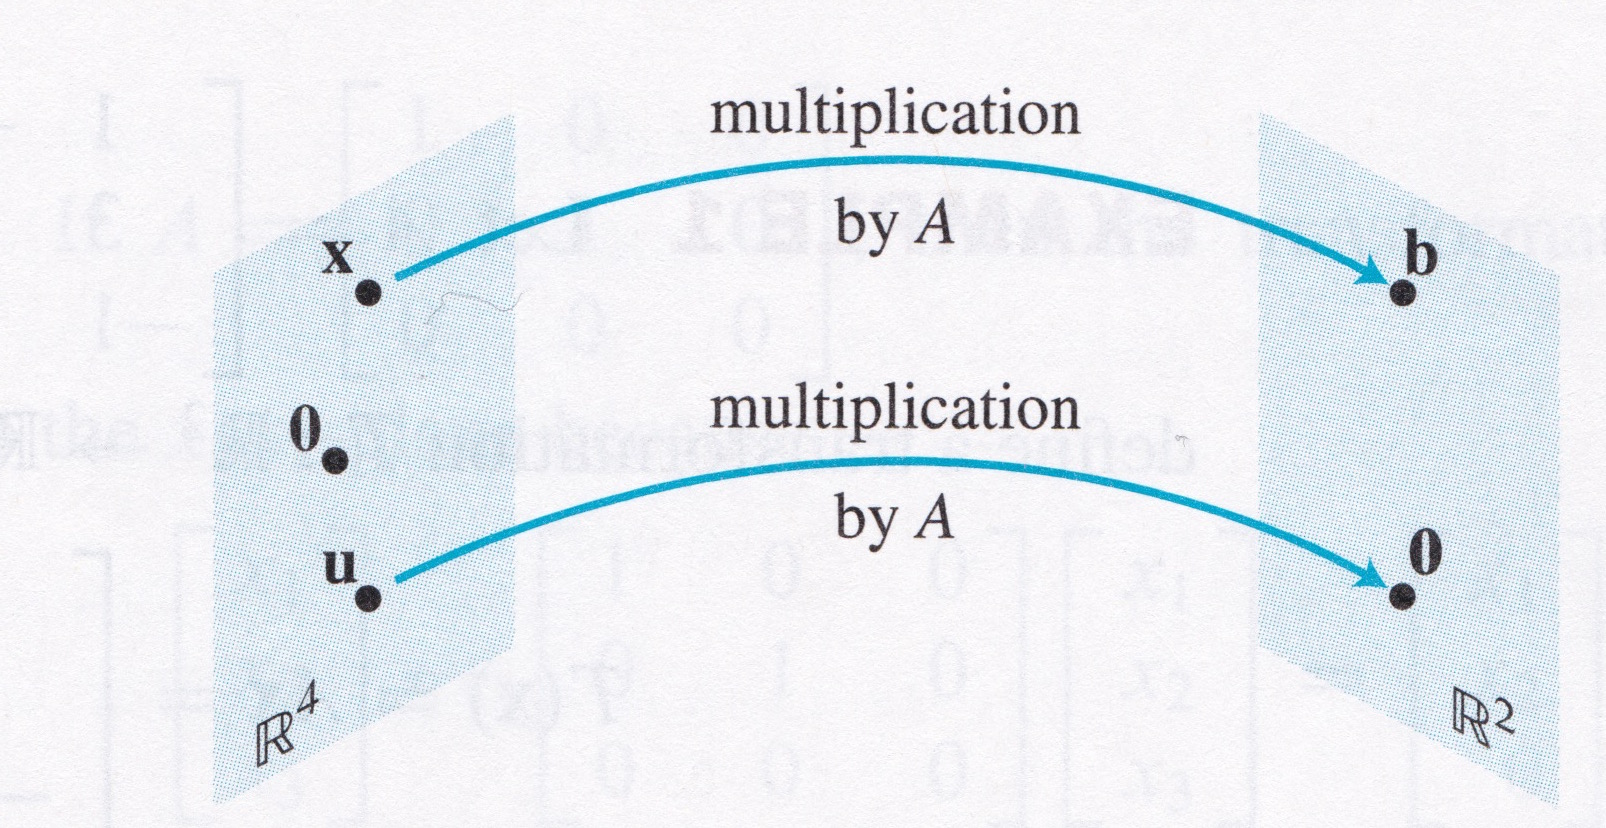

In [4]:
# image credit: Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-1-8-1.jpg", width=450))

This gives a __new__ way of thinking about solving $A{\bf x} = {\bf b}$.  We are "searching" for the vectors ${\bf x}$ in $\mathbb{R}^4$ that are transformed into ${\bf b}$ in $\mathbb{R}^2$ under the "action" of $A$. 

We have moved out of the familiar world of functions of one variable:  we are now thinking about functions that transform a vector into a vector.  

Or, put another way, functions that transform multiple variables into multiple variables.

Some terminology:

A __transformation__ (or __function__ or __mapping__) $T$ from $\mathbb{R}^n$ to $\mathbb{R}^m$ is a rule that assigns to each vector ${\bf x}$ in $\mathbb{R}^n$ a vector $T({\bf x})$ in $\mathbb{R}^m$.   

The set $\mathbb{R}^n$ is called the __domain__ of $T$, and $\mathbb{R}^m$ is called the __codomain__ of $T$.  

The notation:

$$ T: \mathbb{R}^n \rightarrow \mathbb{R}^m$$ 

indicates that the domain of $T$ is $\mathbb{R}^n$ and the codomain is $\mathbb{R}^m$.

For $\bf x$ in $\mathbb{R}^n,$ the vector $T({\bf x})$ is called the __image__ of $\bf x$ (under $T$).  The set of all images $T({\bf x})$ is called the __range__ of $T$.

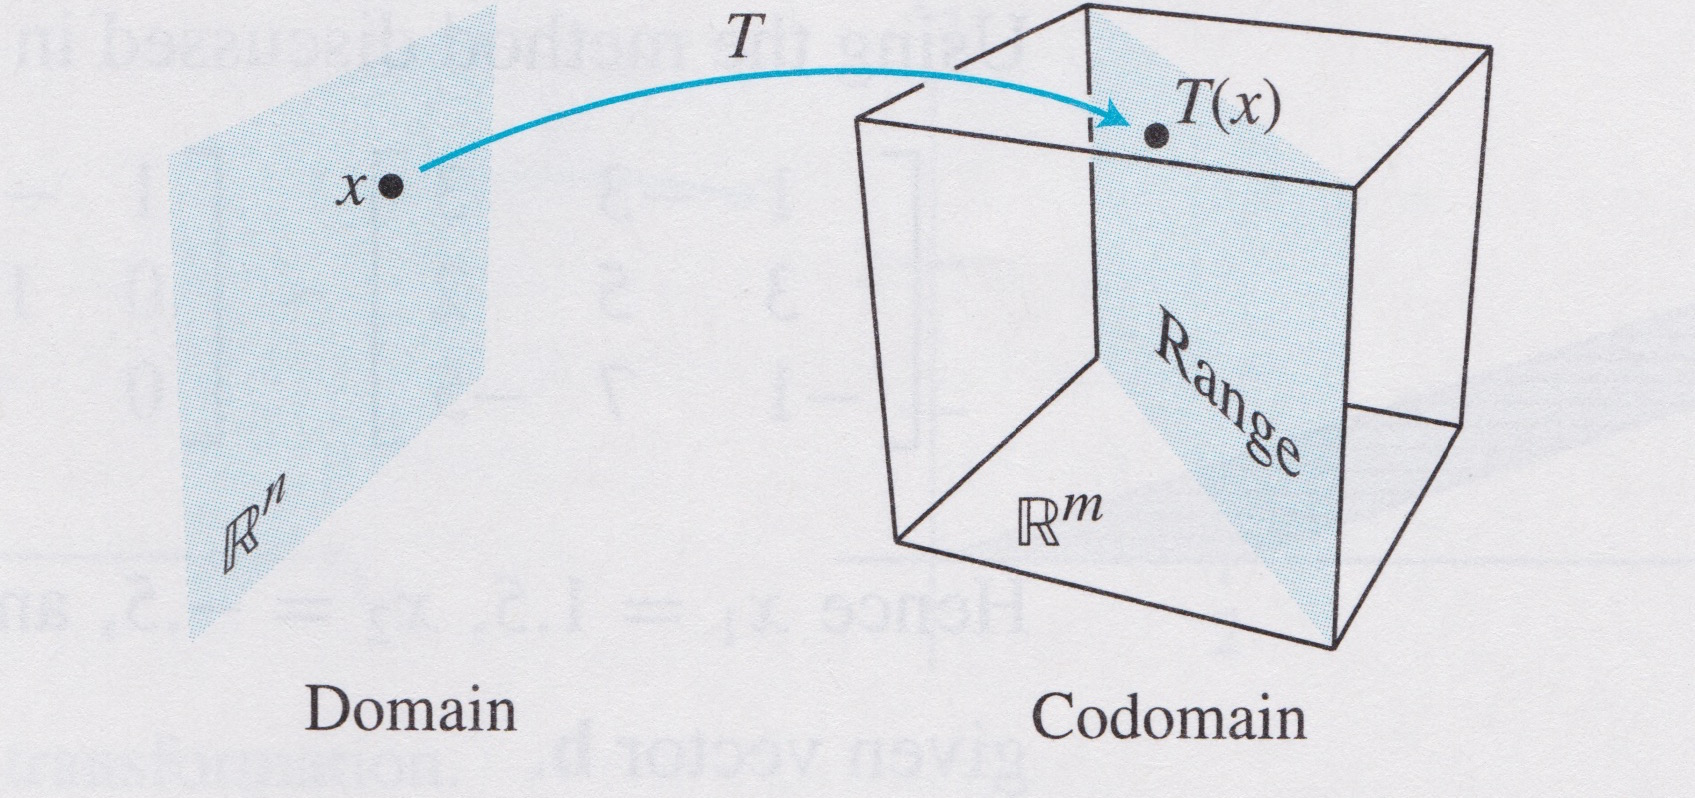

In [5]:
# image credit: Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-1-8-2.jpg", width=450))

## Question Time! Q7.1

Let's do an example.   Let's say I have these points in $\mathbb{R}^2$:

$$ \left[\begin{array}{r}0\\1\end{array}\right],\left[\begin{array}{r}1\\1\end{array}\right],\left[\begin{array}{r}1\\0\end{array}\right],\left[\begin{array}{r}0\\0\end{array}\right]$$

Where are these points located?

[[ 0.  1.  1.  0.]
 [ 1.  1.  0.  0.]]


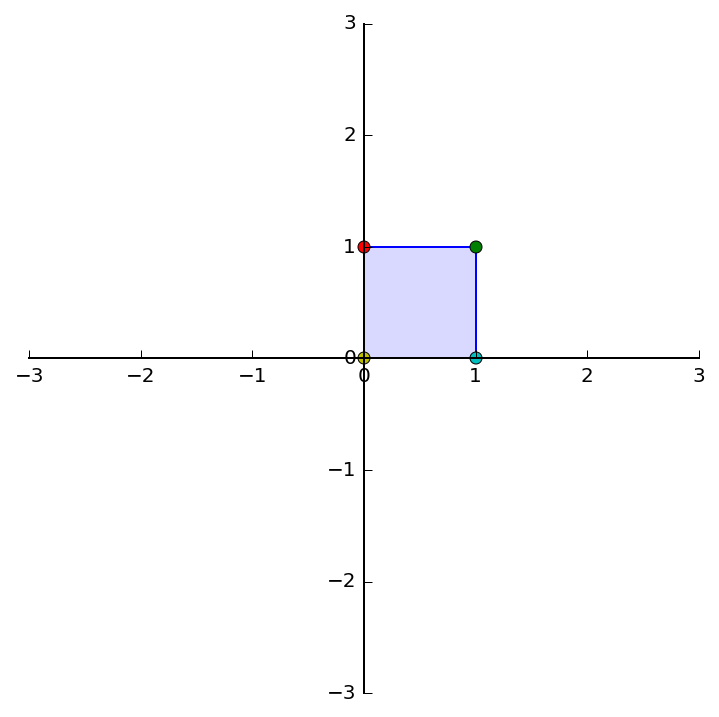

In [6]:
square = np.array([[0.0,1,1,0],[1,1,0,0]])
dm.plotSetup()
print(square)
dm.plotSquare(square)

Now let's transform each of these points according to the following rule.   Let 

$$ A = \left[\begin{array}{rr}1&1.5\\0&1\end{array}\right]. $$

We define $T({\bf x}) = A{\bf x}$.  Then we have 

$$ T: \mathbb{R}^2 \rightarrow \mathbb{R}^2.$$

What is the image of each of these points under $T$?

$$ A\left[\begin{array}{r}0\\1\end{array}\right] = \left[\begin{array}{r}1.5\\1\end{array}\right]$$


$$ A\left[\begin{array}{r}1\\1\end{array}\right] = \left[\begin{array}{r}2.5\\1\end{array}\right]$$


$$ A\left[\begin{array}{r}1\\0\end{array}\right] = \left[\begin{array}{r}1\\0\end{array}\right]$$


$$ A\left[\begin{array}{r}0\\0\end{array}\right] = \left[\begin{array}{r}0\\0\end{array}\right]$$

square = 
[[ 0.  1.  1.  0.]
 [ 1.  1.  0.  0.]]
A matrix = 
[[ 1.  2.]
 [ 0.  1.]]
sheared square = 
[[ 2.  3.  1.  0.]
 [ 1.  1.  0.  0.]]


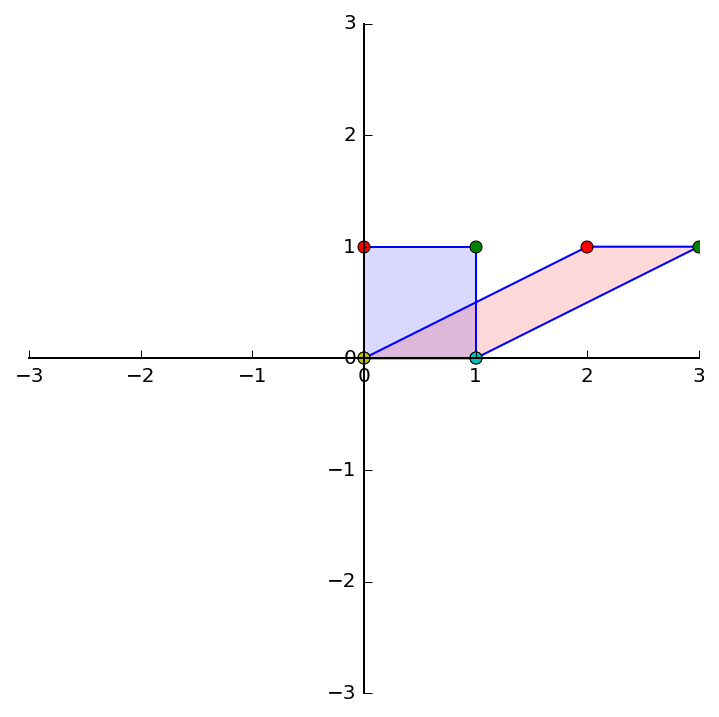

In [7]:
ax = dm.plotSetup()
print("square = "); print(square)
dm.plotSquare(square)
#
# create the A matrix
A = np.array([[1.0, 2],[0.0,1.0]])
print("A matrix = "); print(A)
#
# apply the shear matrix to the square
ssquare = np.zeros(np.shape(square))
for i in range(4):
    ssquare[:,i] = dm.AxVS(A,square[:,i])
print("sheared square = "); print(ssquare)
dm.plotSquare(ssquare,'r')

This sort of transformation, where points are successively slid sideways, is called a __shear__ transformation.

## Linear Transformations

By the properties of matrix-vector multiplication, we know that the transformation ${\bf x} \mapsto A{\bf x}$ has the properties that 

$$ A({\bf u} + {\bf v}) = A{\bf u} + A{\bf v} \;\;\;\mbox{and}\;\;\; A(c{\bf u}) = cA{\bf u}$$

for all $\bf u, v$ in $\mathbb{R}^n$ and all scalars $c$.

We are now ready to define one of the most fundamental concepts in the course: the concept of a _linear transformation_.  

(You are now finding out why the subject is called linear algebra!)

__Definition.__  A transformation $T$ is __linear__ if:
1. $T({\bf u} + {\bf v}) = T({\bf u}) + T({\bf v}) \;\;\;$ for all $\bf u, v$ in the domain of $T$; and
2. $T(c{\bf u}) = cT({\bf u}) \;\;\;$ for all scalars $c$ and all $\bf u$ in the domain of $T$.

## Question Time! Q7.2

To fully grasp the significance of what a linear transformation is, don't think of just matrix-vector multiplication.  Think of $T$ as a function in more general terms.  

The definition above captures a _lot_ of functions that are not matrix-vector multiplication.  For example, think of:

$$ T(x) = \int_0^1 x(t) \,dt $$
Is $T$ a linear function?

## Properties of Linear Transformations

A key aspect of a linear transformation is that it __preserves the operations of vector addition and scalar multiplication.__

For example: for vectors $\vu$ and $\vv$, one can either:
1. Transform them both according to $T()$, then add them, or:
2. Add them, and then transform the result according to $T()$.

One gets the same result either way.  The transformation does not affect the addition.

This leads to two important facts.

If $T$ is a linear transformation, then

$$ T({\mathbf 0}) = {\mathbf 0} $$

and

$$ T(c\vu + d\vv) = cT(\vu) + dT(\vv) $$

In fact, if a transformation satisfies the second equation for all $\vu, \vv$ and $c, d,$ then it must be a linear transformation.   Both of the rules defining a linear transformation derive from this single equation.

__Example.__

Given a scalar $r$, define $T: \R^2 \rightarrow \R^2$ by $T(\vx) = r\vx$.  

($T$ is called a __contraction__ when $0\leq r \leq 1$ and a __dilation__ when $r > 1$.)  

Let $r = 3$, and show that $T$ is a linear transformation.

__Solution.__

Let $\vu, \vv$ be in $\R^2$ and let $c, d$ be scalars.   Then

$$
T(c\vu + d\vv) = 3(c\vu + d\vv)
$$

$$ = 3c\vu + 3d\vv $$

$$ = c(3\vu) + d(3\vv) $$

$$ = cT(\vu) + dT(\vv) $$

Thus $T$ is a linear transformation because it satisfies the rule $T(c\vu + d\vv) = cT(\vu) + dT(\vv)$.